                   SHIFT_ID                 WORKER_ID              WORKPLACE_ID      SHIFT_START_AT    SHIFT_CREATED_AT     OFFER_VIEWED_AT   RATE  DURATION SLOT CLAIMED_AT          DELETED_AT  IS_VERIFIED CANCELED_AT  IS_NCNS
0  66fabb7aaa2ce977d1aa5dd4  661ace49b44011b92cf09db6  5e84da485dd18c00164a3dd8 2024-09-30 15:45:00 2024-09-30 14:53:46 2024-09-30 15:02:12  25.27      6.00   am        NaT                 NaT        False         NaT    False
1  66db26aa03d526ef25f476c7  6306a1090d8b6801b5c1b085  6116cd18780dfd0166de344a 2024-10-01 18:30:00 2024-09-06 15:58:34 2024-09-14 15:27:38  22.26      7.50   pm        NaT 2024-09-20 16:30:45        False         NaT    False
2  66fa173b1141258d42209761  65a0006427861cb389880afc  6435ce45c242c401bbc57725 2024-09-30 14:00:00 2024-09-30 03:12:59 2024-09-30 04:21:46  21.61      8.00   am        NaT                 NaT        False         NaT    False
3  66f5e216d4d0fab6c061d96d  625ded8968ff6601ae52feba  61ba8d2175864101857ebe11 2024-09-29 2

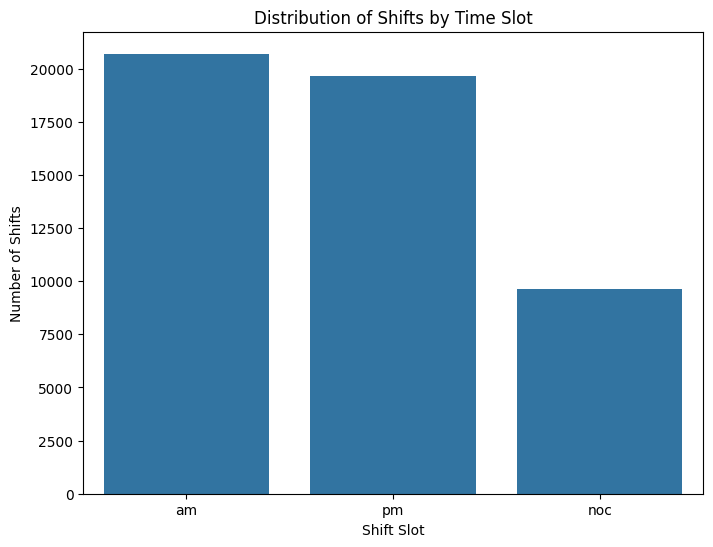

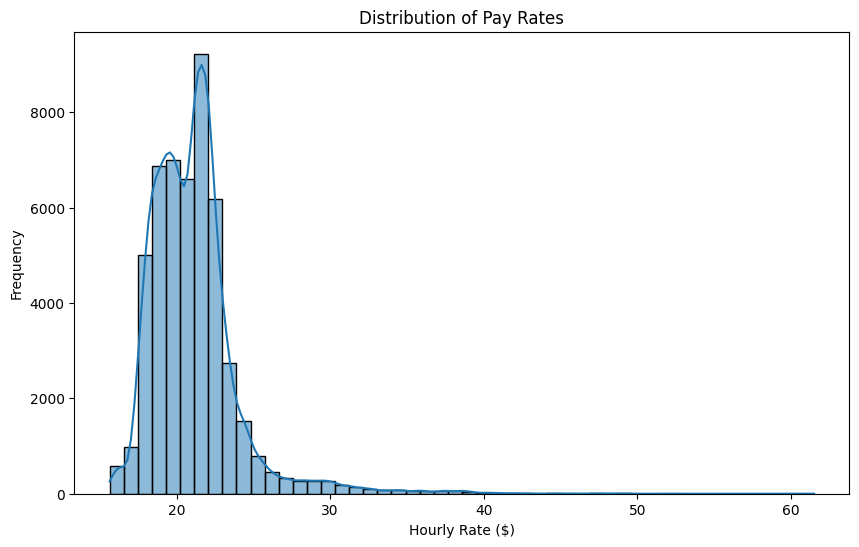

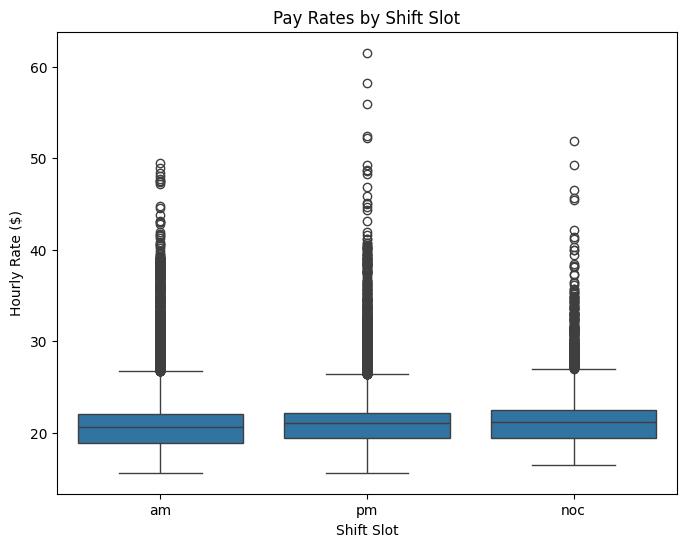

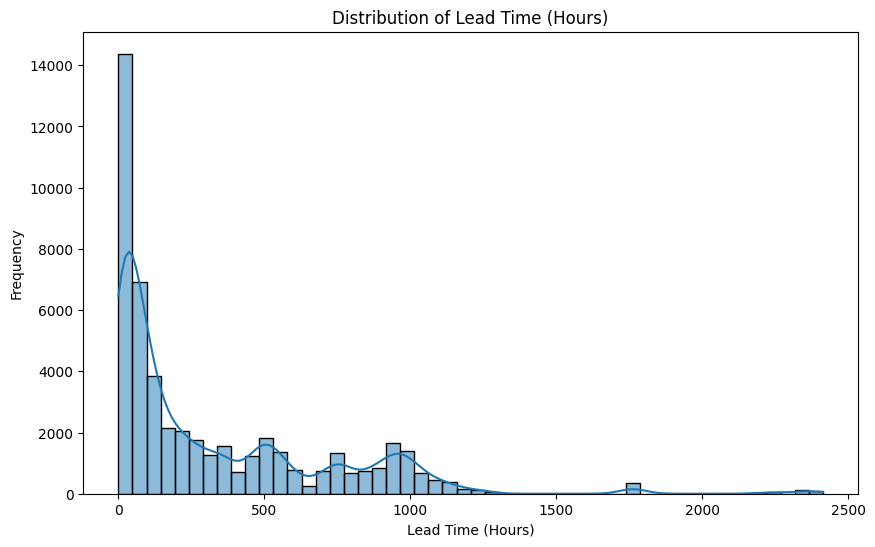

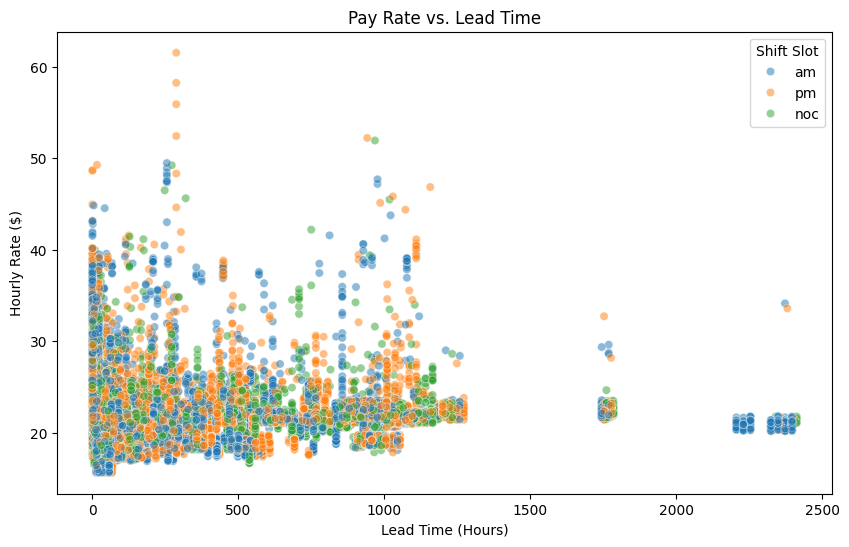

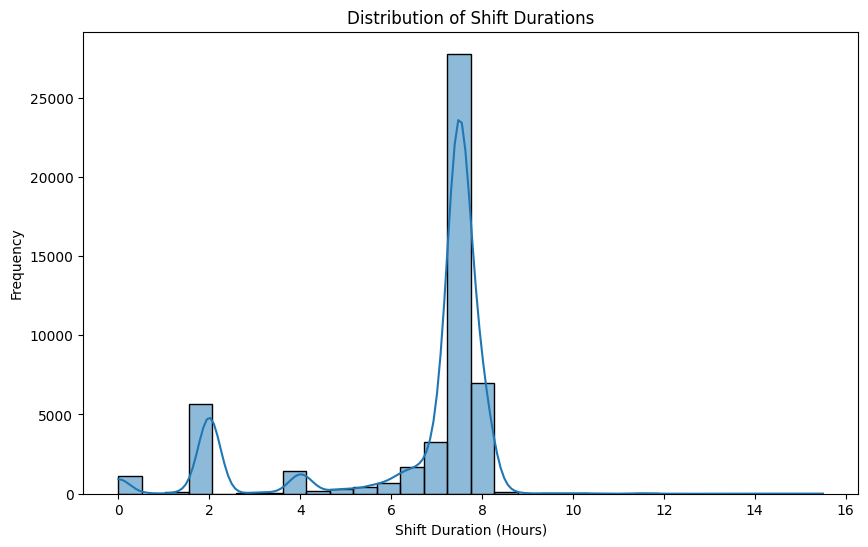

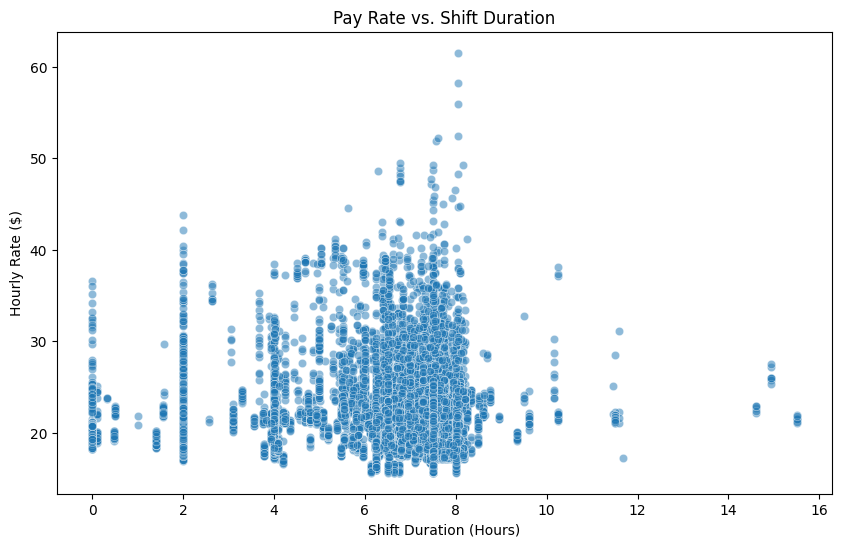

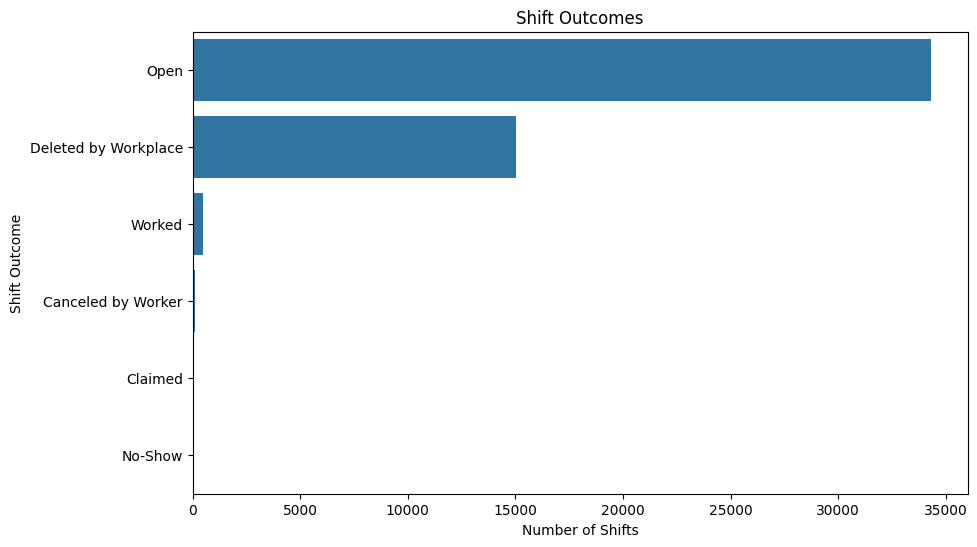

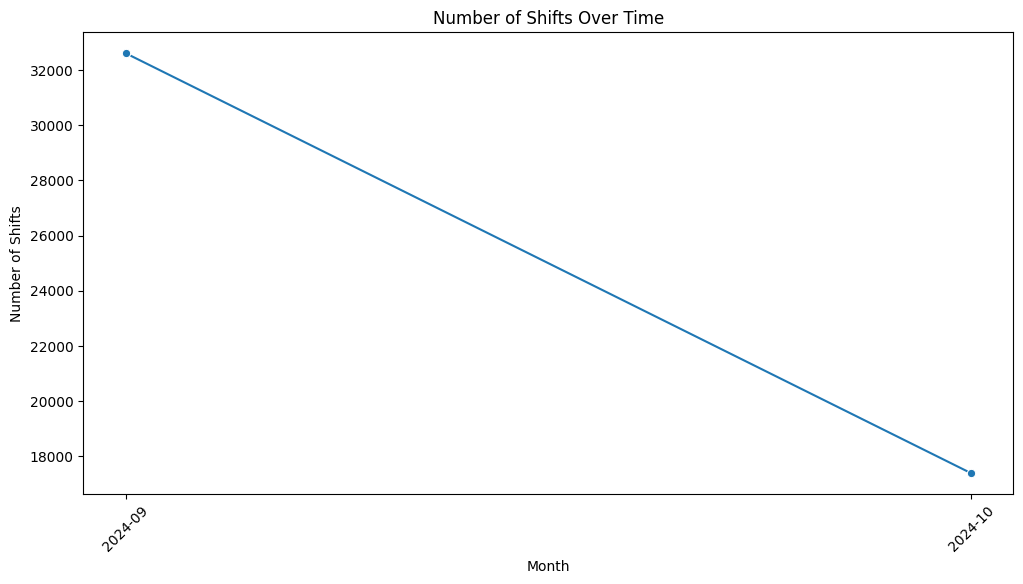

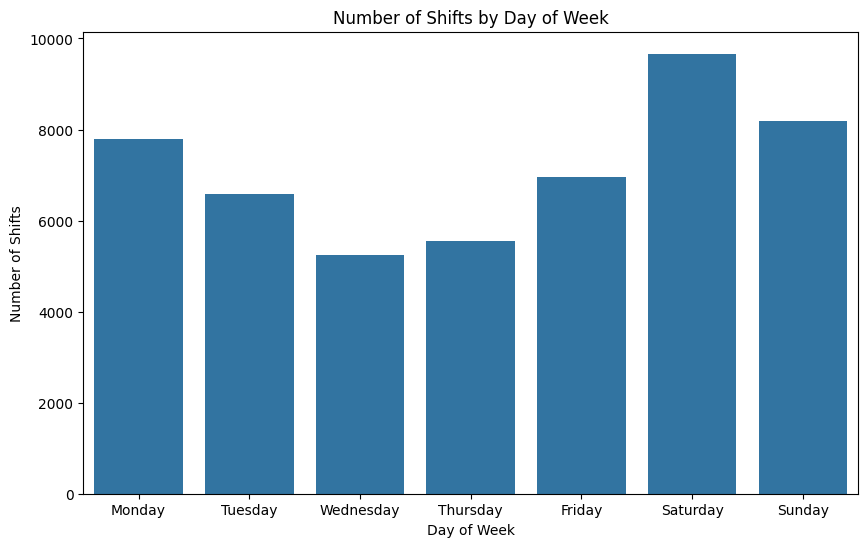

<ipython-input-1-e43a1c23c460>:170: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SHIFT_START_HOUR', data=df, palette='viridis')


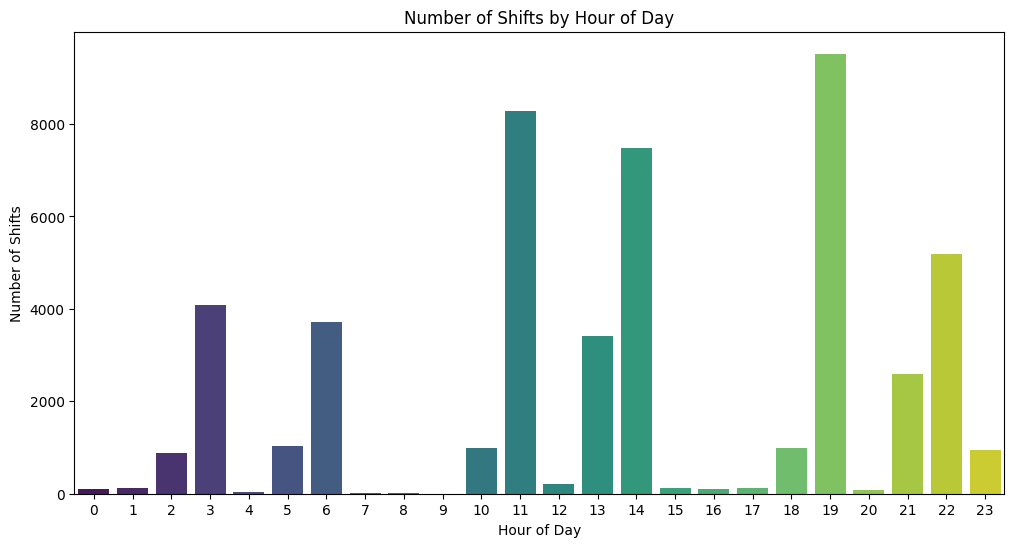

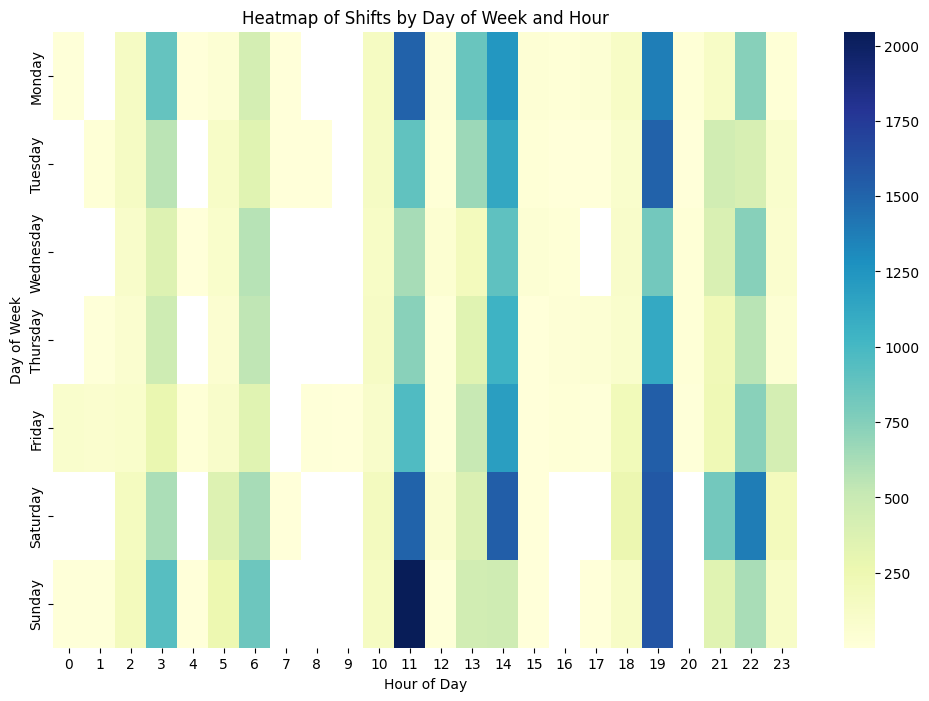

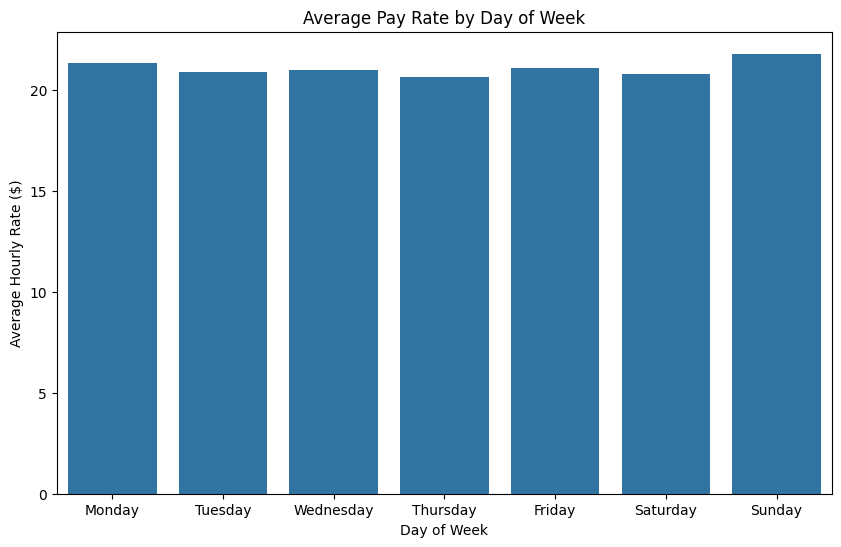

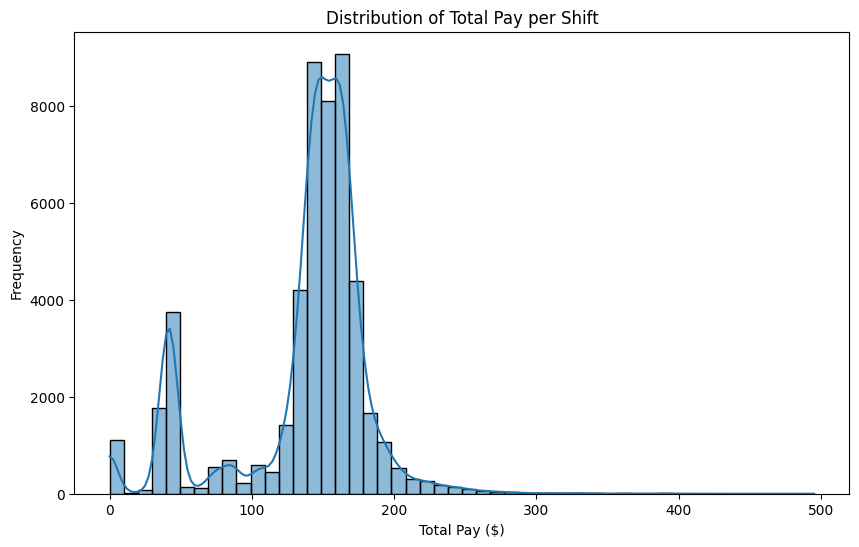

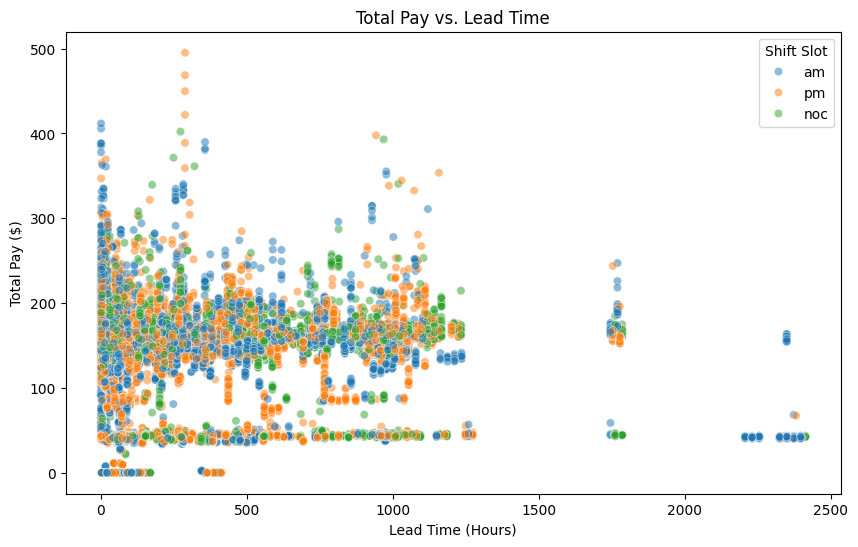

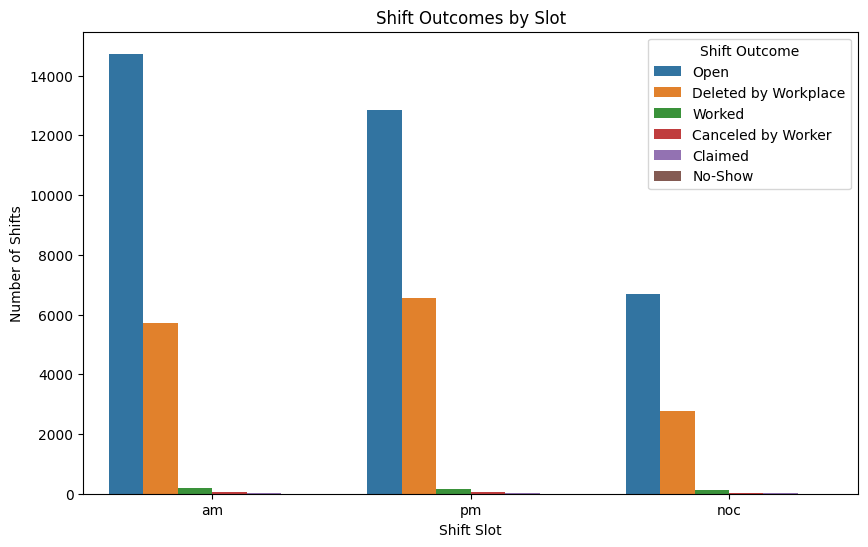

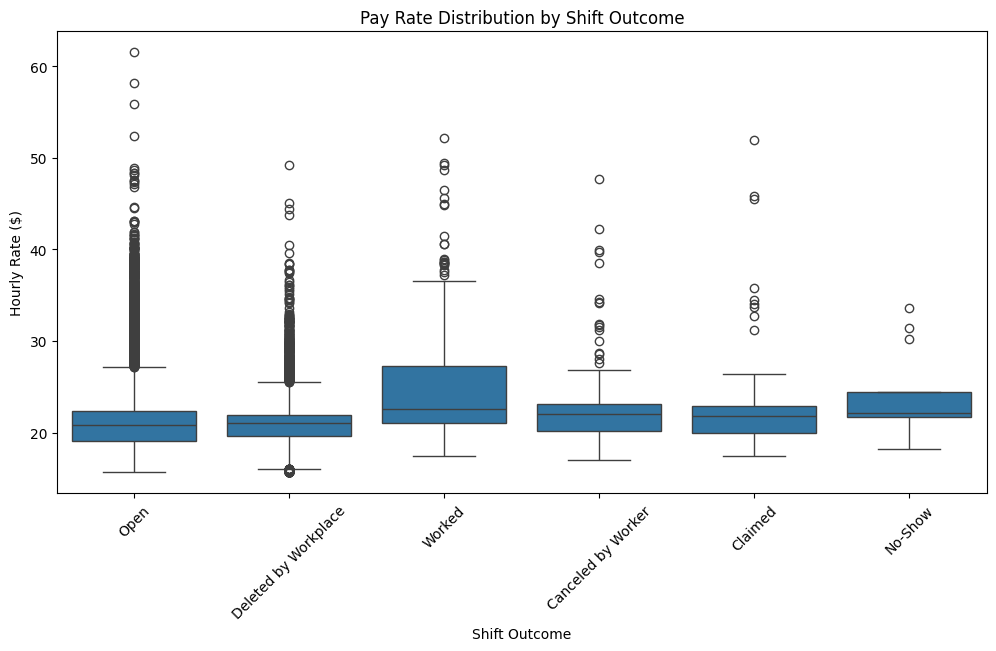

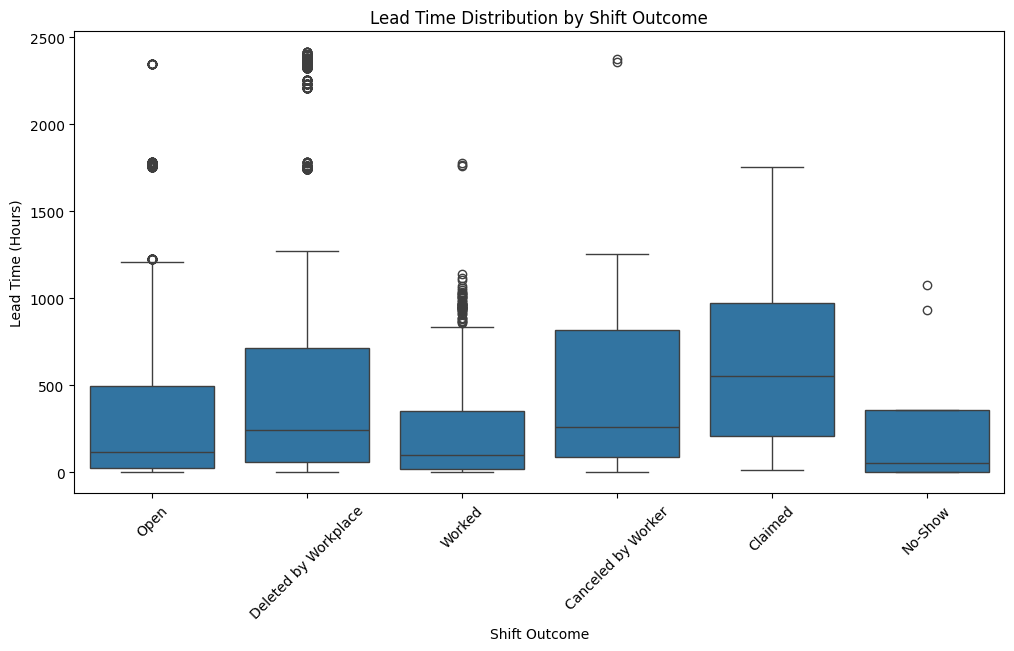

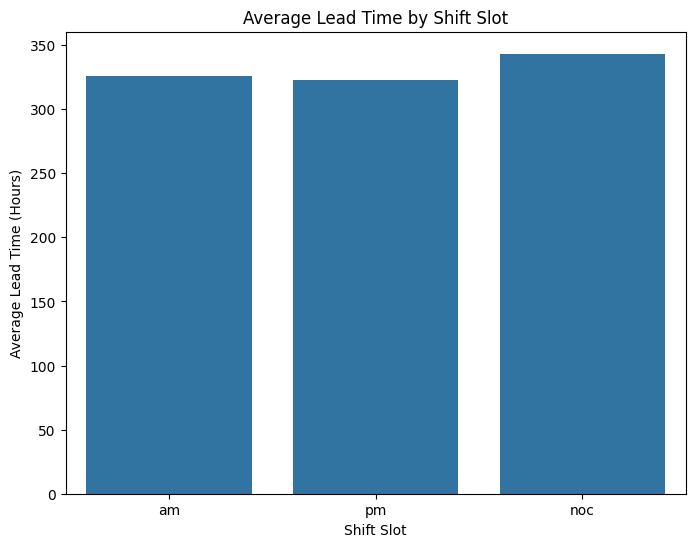

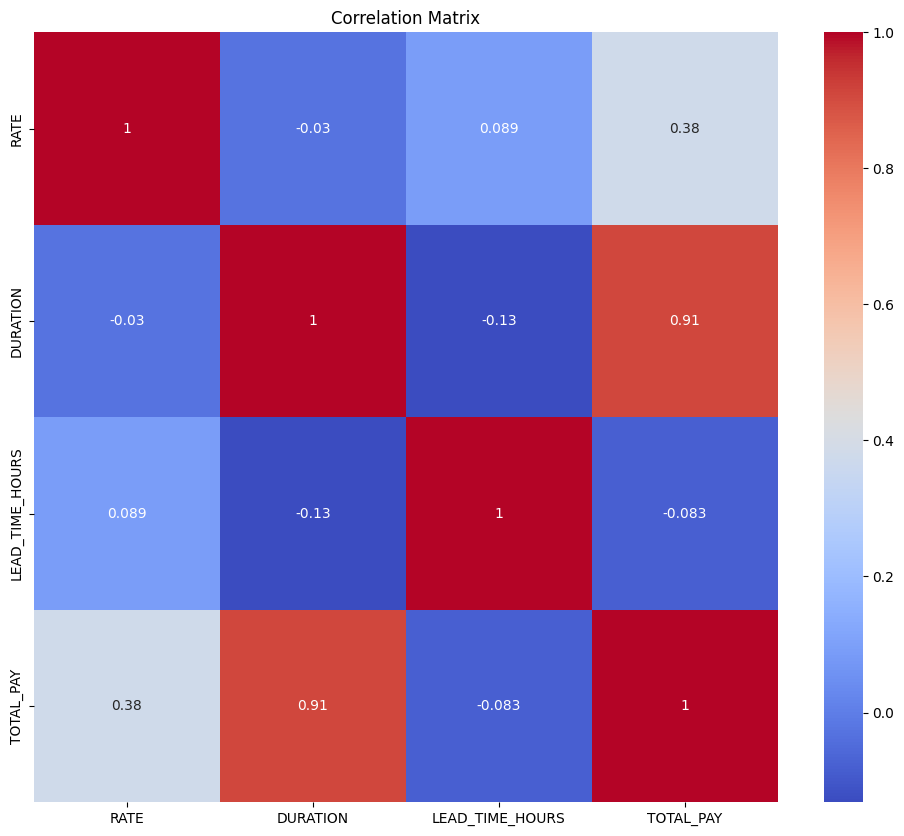

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates  # Import for date formatting

# Increase the display options for better readability (optional)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Load the dataset
# Replace 'shift_offers.csv' with the path to your CSV file
df = pd.read_csv('/content/problems_we_tackle_data.csv', parse_dates=[
    'SHIFT_START_AT', 'SHIFT_CREATED_AT', 'OFFER_VIEWED_AT',
    'CLAIMED_AT', 'CANCELED_AT', 'DELETED_AT'
])

# Preview the first few rows
print(df.head())

# Data Preprocessing

# 1. Handle Missing Values
# For this script, we'll keep all rows and handle missing values in analyses as needed

# 2. Create Additional Columns

# a. Lead Time (in hours): Time between shift creation and shift start
df['LEAD_TIME_HOURS'] = (df['SHIFT_START_AT'] - df['SHIFT_CREATED_AT']).dt.total_seconds() / 3600

# b. Time Between Offer Viewed and Shift Start
df['VIEW_TO_START_HOURS'] = (df['SHIFT_START_AT'] - df['OFFER_VIEWED_AT']).dt.total_seconds() / 3600

# c. Shift Outcome
def determine_shift_outcome(row):
    if pd.notnull(row['IS_VERIFIED']) and row['IS_VERIFIED']:
        return 'Worked'
    elif pd.notnull(row['IS_NCNS']) and row['IS_NCNS']:
        return 'No-Show'
    elif pd.notnull(row['CANCELED_AT']):
        return 'Canceled by Worker'
    elif pd.notnull(row['DELETED_AT']):
        return 'Deleted by Workplace'
    elif pd.notnull(row['CLAIMED_AT']):
        return 'Claimed'
    else:
        return 'Open'
df['SHIFT_OUTCOME'] = df.apply(determine_shift_outcome, axis=1)

# d. Total Pay for Shift
df['TOTAL_PAY'] = df['RATE'] * df['DURATION']

# e. Day of Week and Hour of Day for Shift Start
df['SHIFT_DAY_OF_WEEK'] = df['SHIFT_START_AT'].dt.day_name()
df['SHIFT_START_HOUR'] = df['SHIFT_START_AT'].dt.hour

# f. Month of Shift Start as datetime
df['SHIFT_MONTH'] = df['SHIFT_START_AT'].dt.to_period('M').dt.to_timestamp()

# Data Exploration and Visualization

# 1. Distribution of Shifts by Time Slot
plt.figure(figsize=(8, 6))
sns.countplot(x='SLOT', data=df, order=['am', 'pm', 'noc'])
plt.title('Distribution of Shifts by Time Slot')
plt.xlabel('Shift Slot')
plt.ylabel('Number of Shifts')
plt.savefig('/content/distribution_shifts_time_slot.png')
plt.show()

# 2. Distribution of Pay Rates
plt.figure(figsize=(10, 6))
sns.histplot(df['RATE'], bins=50, kde=True)
plt.title('Distribution of Pay Rates')
plt.xlabel('Hourly Rate ($)')
plt.ylabel('Frequency')
plt.savefig('/content/distribution_pay_rates.png')
plt.show()

# 3. Pay Rates by Shift Slot
plt.figure(figsize=(8, 6))
sns.boxplot(x='SLOT', y='RATE', data=df, order=['am', 'pm', 'noc'])
plt.title('Pay Rates by Shift Slot')
plt.xlabel('Shift Slot')
plt.ylabel('Hourly Rate ($)')
plt.savefig('/content/pay_rates_by_shift_slot.png')
plt.show()

# 4. Lead Time Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['LEAD_TIME_HOURS'], bins=50, kde=True)
plt.title('Distribution of Lead Time (Hours)')
plt.xlabel('Lead Time (Hours)')
plt.ylabel('Frequency')
plt.savefig('/content/lead_time_distribution.png')
plt.show()

# 5. Pay Rate vs. Lead Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LEAD_TIME_HOURS', y='RATE', hue='SLOT', data=df, alpha=0.5)
plt.title('Pay Rate vs. Lead Time')
plt.xlabel('Lead Time (Hours)')
plt.ylabel('Hourly Rate ($)')
plt.legend(title='Shift Slot')
plt.savefig('/content/pay_rate_vs_lead_time.png')
plt.show()

# 6. Shift Duration Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['DURATION'], bins=30, kde=True)
plt.title('Distribution of Shift Durations')
plt.xlabel('Shift Duration (Hours)')
plt.ylabel('Frequency')
plt.savefig('/content/shift_duration_distribution.png')
plt.show()

# 7. Pay Rate vs. Shift Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DURATION', y='RATE', data=df, alpha=0.5)
plt.title('Pay Rate vs. Shift Duration')
plt.xlabel('Shift Duration (Hours)')
plt.ylabel('Hourly Rate ($)')
plt.savefig('/content/pay_rate_vs_shift_duration.png')
plt.show()

# 8. Shift Outcomes
plt.figure(figsize=(10, 6))
sns.countplot(y='SHIFT_OUTCOME', data=df, order=df['SHIFT_OUTCOME'].value_counts().index)
plt.title('Shift Outcomes')
plt.xlabel('Number of Shifts')
plt.ylabel('Shift Outcome')
plt.savefig('/content/shift_outcomes.png')
plt.show()

# 9. Shifts Over Time
# Group by 'SHIFT_MONTH' and count shifts
shifts_over_time = df.groupby('SHIFT_MONTH').size().reset_index(name='NUMBER_OF_SHIFTS')

# Sort the DataFrame by 'SHIFT_MONTH'
shifts_over_time = shifts_over_time.sort_values('SHIFT_MONTH')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='SHIFT_MONTH', y='NUMBER_OF_SHIFTS', data=shifts_over_time, marker='o')
plt.title('Number of Shifts Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Shifts')

# Format x-axis for dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

plt.savefig('/content/shifts_over_time.png')
plt.show()

# 10. Shifts by Day of Week
plt.figure(figsize=(10, 6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='SHIFT_DAY_OF_WEEK', data=df, order=order)
plt.title('Number of Shifts by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Shifts')
plt.savefig('/content/shifts_by_day_of_week.png')
plt.show()

# 11. Shifts by Hour of Day
plt.figure(figsize=(12, 6))
sns.countplot(x='SHIFT_START_HOUR', data=df, palette='viridis')
plt.title('Number of Shifts by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Shifts')
plt.savefig('/content/shifts_by_hour_of_day.png')
plt.show()

# 12. Heatmap of Shifts by Day and Hour
pivot_table = df.pivot_table(index='SHIFT_DAY_OF_WEEK', columns='SHIFT_START_HOUR', values='SHIFT_ID', aggfunc='count')
pivot_table = pivot_table.reindex(index=order)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Heatmap of Shifts by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.savefig('/content/heatmap_shifts_day_hour.png')
plt.show()

# 13. Average Pay Rate by Day of Week
average_pay_by_day = df.groupby('SHIFT_DAY_OF_WEEK')['RATE'].mean().reindex(order)
plt.figure(figsize=(10, 6))
sns.barplot(x=average_pay_by_day.index, y=average_pay_by_day.values)
plt.title('Average Pay Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Hourly Rate ($)')
plt.savefig('/content/average_pay_by_day_of_week.png')
plt.show()

# 14. Total Pay Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['TOTAL_PAY'], bins=50, kde=True)
plt.title('Distribution of Total Pay per Shift')
plt.xlabel('Total Pay ($)')
plt.ylabel('Frequency')
plt.savefig('/content/total_pay_distribution.png')
plt.show()

# 15. Scatter Plot: Total Pay vs. Lead Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LEAD_TIME_HOURS', y='TOTAL_PAY', hue='SLOT', data=df, alpha=0.5)
plt.title('Total Pay vs. Lead Time')
plt.xlabel('Lead Time (Hours)')
plt.ylabel('Total Pay ($)')
plt.legend(title='Shift Slot')
plt.savefig('/content/total_pay_vs_lead_time.png')
plt.show()

# 16. Shift Outcomes by Slot
plt.figure(figsize=(10, 6))
sns.countplot(x='SLOT', hue='SHIFT_OUTCOME', data=df, order=['am', 'pm', 'noc'])
plt.title('Shift Outcomes by Slot')
plt.xlabel('Shift Slot')
plt.ylabel('Number of Shifts')
plt.legend(title='Shift Outcome')
plt.savefig('/content/shift_outcomes_by_slot.png')
plt.show()

# 17. Pay Rate Distribution by Shift Outcome
plt.figure(figsize=(12, 6))
sns.boxplot(x='SHIFT_OUTCOME', y='RATE', data=df)
plt.title('Pay Rate Distribution by Shift Outcome')
plt.xlabel('Shift Outcome')
plt.ylabel('Hourly Rate ($)')
plt.xticks(rotation=45)
plt.savefig('/content/pay_rate_by_shift_outcome.png')
plt.show()

# 18. Lead Time Distribution by Shift Outcome
plt.figure(figsize=(12, 6))
sns.boxplot(x='SHIFT_OUTCOME', y='LEAD_TIME_HOURS', data=df)
plt.title('Lead Time Distribution by Shift Outcome')
plt.xlabel('Shift Outcome')
plt.ylabel('Lead Time (Hours)')
plt.xticks(rotation=45)
plt.savefig('/content/lead_time_by_shift_outcome.png')
plt.show()

# 19. Average Lead Time by Shift Slot
average_lead_time_by_slot = df.groupby('SLOT')['LEAD_TIME_HOURS'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=average_lead_time_by_slot.index, y=average_lead_time_by_slot.values, order=['am', 'pm', 'noc'])
plt.title('Average Lead Time by Shift Slot')
plt.xlabel('Shift Slot')
plt.ylabel('Average Lead Time (Hours)')
plt.savefig('/content/average_lead_time_by_shift_slot.png')
plt.show()

# 20. Correlation Matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df[['RATE', 'DURATION', 'LEAD_TIME_HOURS', 'TOTAL_PAY']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('/content/correlation_matrix.png')
plt.show()


Cross-validation Accuracy Scores: [0.94262045 0.9634072  0.96183167 0.96188056 0.96060991]
Mean Cross-validation Accuracy: 0.958069958227995
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      9838
           1       0.96      0.96      0.96      9838

    accuracy                           0.96     19676
   macro avg       0.96      0.96      0.96     19676
weighted avg       0.96      0.96      0.96     19676



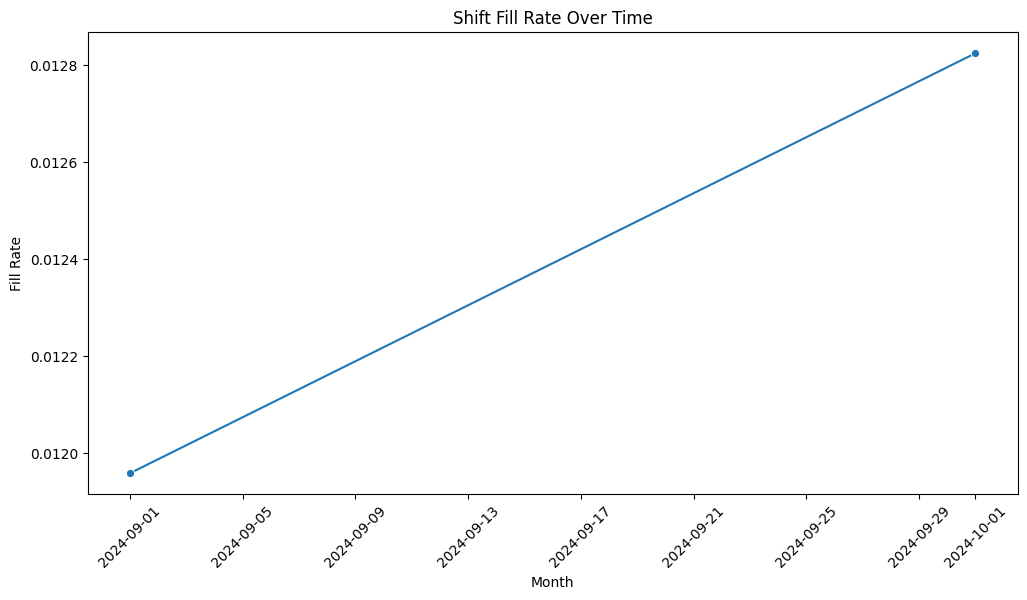

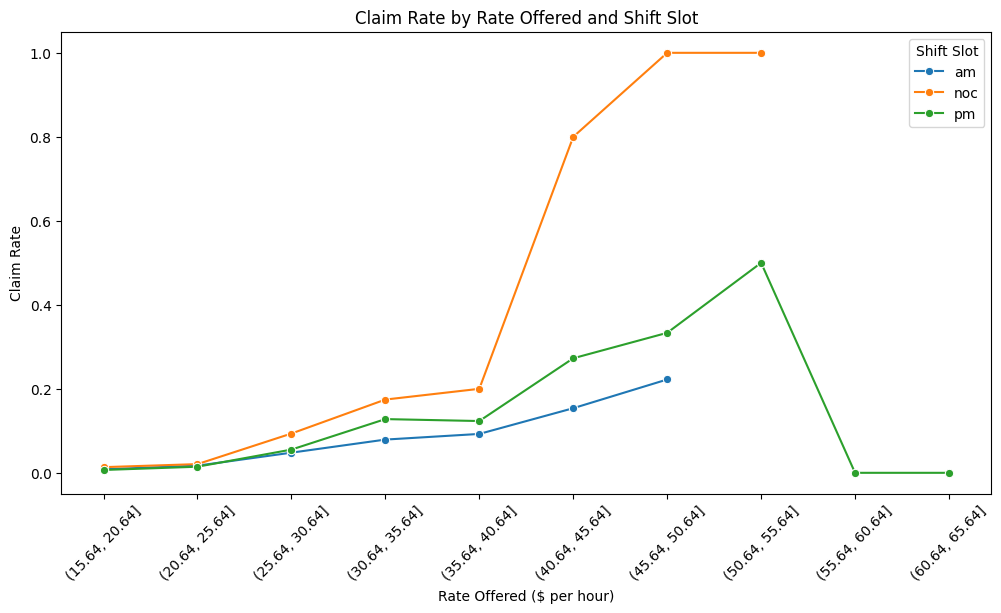

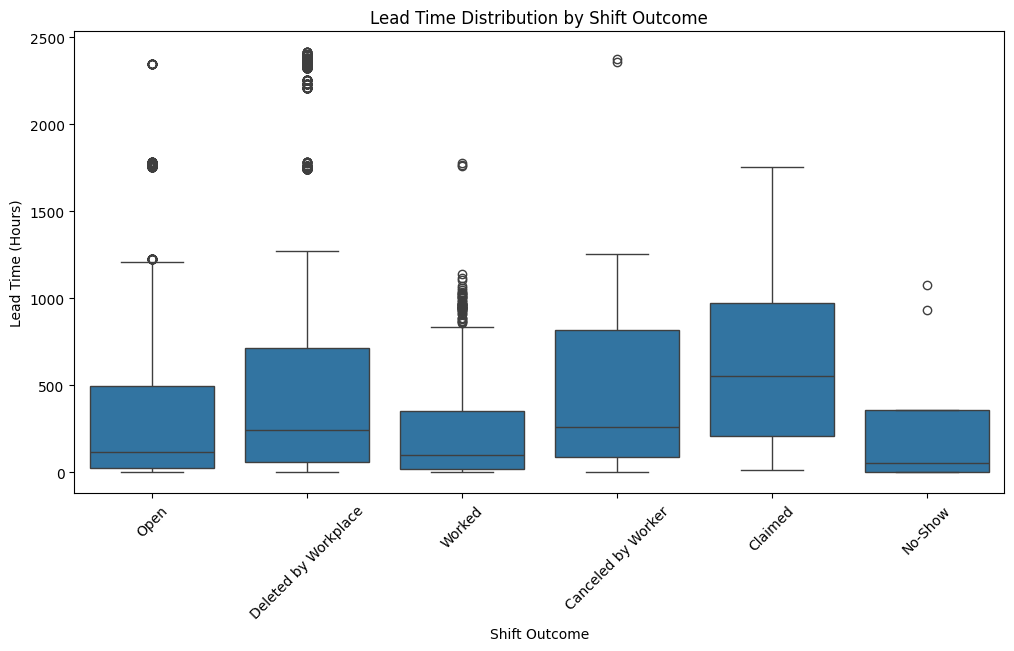

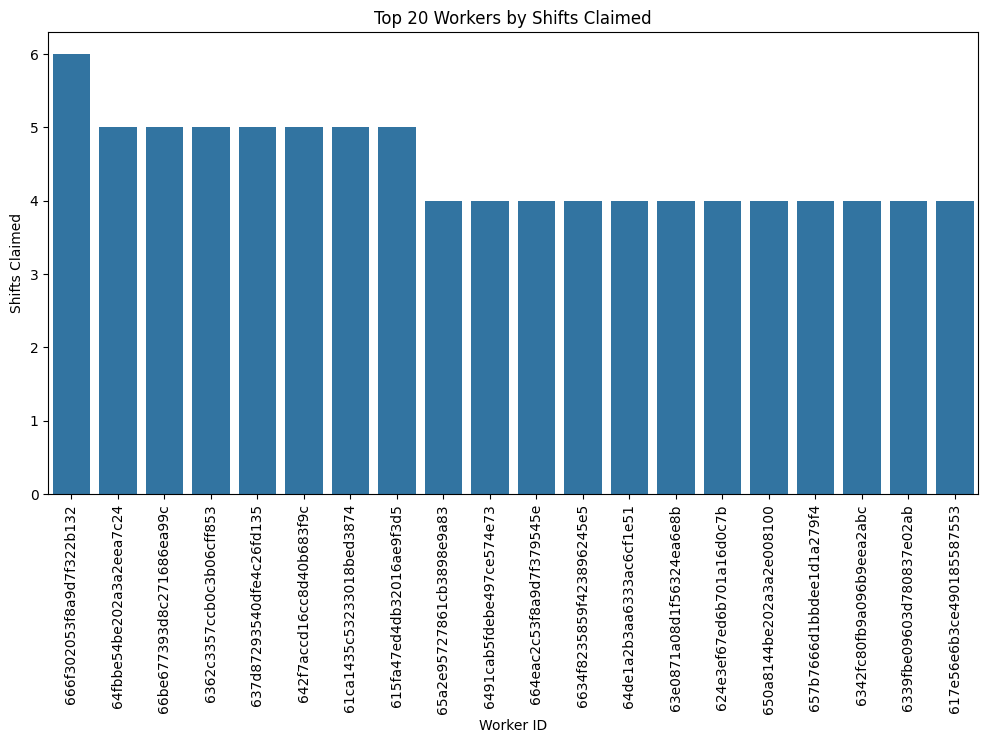

Total Revenue: $85,428.99


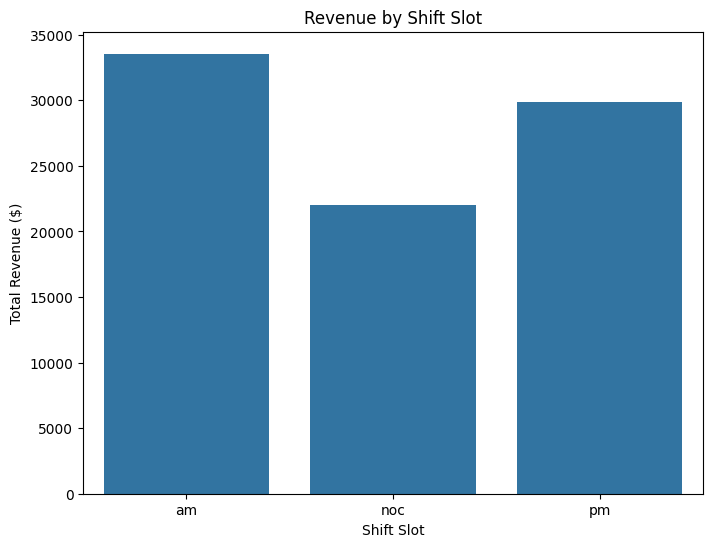

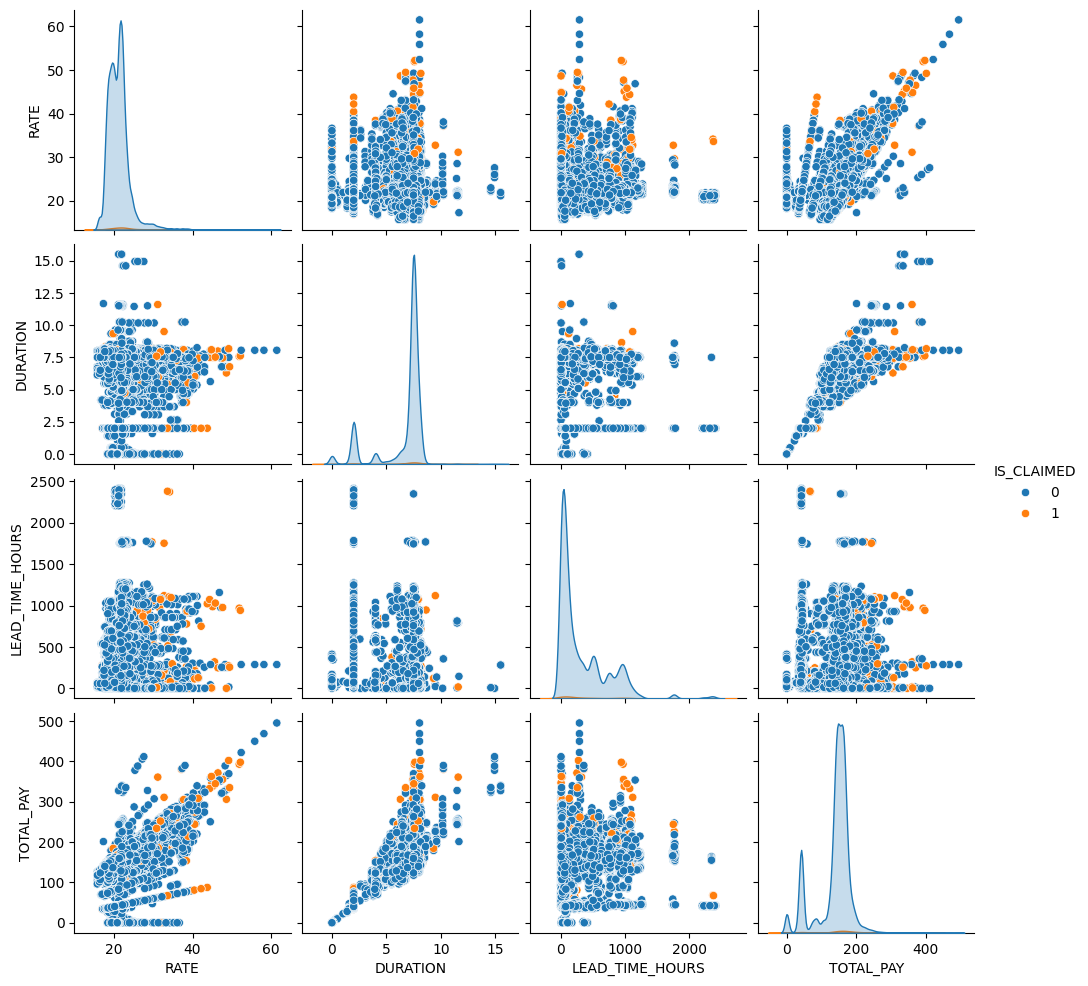

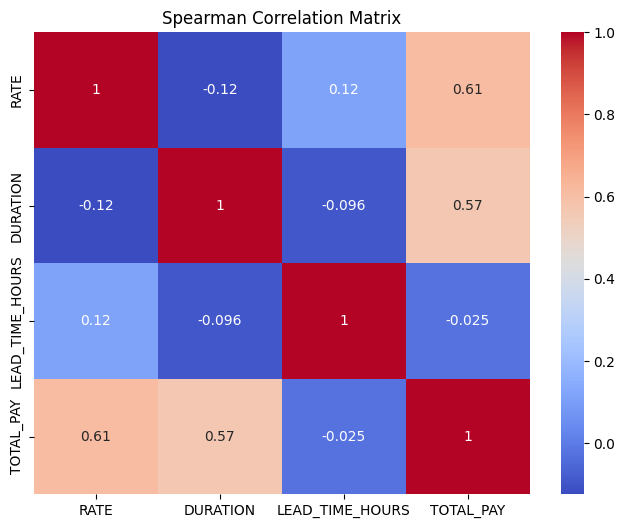

In [2]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report

# Additional Analyses and Visualizations

# Create IS_CLAIMED column
df['IS_CLAIMED'] = df['CLAIMED_AT'].notnull().astype(int)

# Select features and target variable
feature_cols = ['RATE', 'DURATION', 'LEAD_TIME_HOURS', 'SLOT', 'SHIFT_DAY_OF_WEEK', 'SHIFT_START_HOUR']
X = df[feature_cols]
y = df['IS_CLAIMED']

# Convert categorical variables
X = pd.get_dummies(X, columns=['SLOT', 'SHIFT_DAY_OF_WEEK'], drop_first=True)

# Handle missing values
X = X.fillna(0)

# Resample the data using SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.2, random_state=42)

# Random Forest Classifier with hyperparameter tuning to prevent overfitting
rf_model = RandomForestClassifier(n_estimators=150, random_state=42, class_weight='balanced', max_depth=15, min_samples_split=5, min_samples_leaf=3)
rf_model.fit(X_train, y_train)

# Cross-validation to evaluate model performance
cv_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=5)
print(f'Cross-validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-validation Accuracy: {cv_scores.mean()}')

# Evaluate the model on the test set
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature Importance Analysis
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.savefig('/content/feature_importance.png')
plt.close()
plt.show()

# Worker Behavior Analysis
# Calculate cancellation and no-show counts
worker_stats = df.groupby('WORKER_ID').agg({
    'SHIFT_ID': 'count',
    'CANCELED_AT': lambda x: x.notnull().sum(),
    'IS_NCNS': 'sum'
}).rename(columns={
    'SHIFT_ID': 'TOTAL_SHIFTS',
    'CANCELED_AT': 'TOTAL_CANCELLATIONS',
    'IS_NCNS': 'TOTAL_NCNS'
})

# Calculate rates
worker_stats['CANCELLATION_RATE'] = worker_stats['TOTAL_CANCELLATIONS'] / worker_stats['TOTAL_SHIFTS']
worker_stats['NCNS_RATE'] = worker_stats['TOTAL_NCNS'] / worker_stats['TOTAL_SHIFTS']

# Plot distribution of cancellation rates
plt.figure(figsize=(10, 6))
sns.histplot(worker_stats['CANCELLATION_RATE'], bins=30, kde=True)
plt.title('Distribution of Worker Cancellation Rates')
plt.xlabel('Cancellation Rate')
plt.ylabel('Number of Workers')
plt.savefig('/content/cancellation_rate_distribution.png')
plt.close()
plt.show()

# Shift Fill Rate Over Time
# Create IS_FILLED column
df['IS_FILLED'] = df['IS_VERIFIED'] | df['IS_NCNS'] | df['CANCELED_AT'].notnull()

# Group by month
monthly_fill_rate = df.groupby(df['SHIFT_MONTH'], observed=True).agg({
    'SHIFT_ID': 'count',
    'IS_FILLED': 'sum'
}).rename(columns={
    'SHIFT_ID': 'TOTAL_SHIFTS',
    'IS_FILLED': 'FILLED_SHIFTS'
})
monthly_fill_rate['FILL_RATE'] = monthly_fill_rate['FILLED_SHIFTS'] / monthly_fill_rate['TOTAL_SHIFTS']

# Plot fill rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_fill_rate.index, y='FILL_RATE', data=monthly_fill_rate, marker='o')
plt.title('Shift Fill Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Fill Rate')
plt.xticks(rotation=45)
plt.savefig('/content/fill_rate_over_time.png')
plt.show()

# Rate Optimization Analysis
# Create rate buckets
df['RATE_BUCKET'] = pd.cut(df['RATE'], bins=np.arange(df['RATE'].min(), df['RATE'].max() + 5, 5))

# Calculate claim rates
claim_rates = df.groupby(['SLOT', 'RATE_BUCKET'], observed=True)['IS_CLAIMED'].mean().reset_index()

# Convert RATE_BUCKET to string for plotting purposes
claim_rates['RATE_BUCKET'] = claim_rates['RATE_BUCKET'].astype(str)

# Plot claim rates by rate offered and shift slot
plt.figure(figsize=(12, 6))
sns.lineplot(x='RATE_BUCKET', y='IS_CLAIMED', hue='SLOT', data=claim_rates, marker='o')
plt.title('Claim Rate by Rate Offered and Shift Slot')
plt.xlabel('Rate Offered ($ per hour)')
plt.ylabel('Claim Rate')
plt.legend(title='Shift Slot')
plt.xticks(rotation=45)
plt.savefig('/content/claim_rate_by_rate_slot.png')
plt.show()

# Lead Time Impact on Shift Outcome
# Boxplot of lead time by shift outcome
plt.figure(figsize=(12, 6))
sns.boxplot(x='SHIFT_OUTCOME', y='LEAD_TIME_HOURS', data=df)
plt.title('Lead Time Distribution by Shift Outcome')
plt.xlabel('Shift Outcome')
plt.ylabel('Lead Time (Hours)')
plt.xticks(rotation=45)
plt.savefig('/content/lead_time_by_shift_outcome.png')
plt.show()

# Worker Engagement Analysis
# Calculate shifts claimed and worked per worker
worker_engagement = df[df['IS_CLAIMED'] == 1].groupby('WORKER_ID').agg({
    'SHIFT_ID': 'count',
    'IS_VERIFIED': 'sum'
}).rename(columns={
    'SHIFT_ID': 'SHIFTS_CLAIMED',
    'IS_VERIFIED': 'SHIFTS_WORKED'
})
worker_engagement['WORK_RATE'] = worker_engagement['SHIFTS_WORKED'] / worker_engagement['SHIFTS_CLAIMED']

# Top 20 workers by shifts claimed
top_workers = worker_engagement.sort_values('SHIFTS_CLAIMED', ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_workers.index, y='SHIFTS_CLAIMED', data=top_workers)
plt.title('Top 20 Workers by Shifts Claimed')
plt.xlabel('Worker ID')
plt.ylabel('Shifts Claimed')
plt.xticks(rotation=90)
plt.savefig('/content/top_workers_by_shifts_claimed.png')
plt.show()

# Revenue Analysis
# Revenue from worked shifts
worked_shifts = df[df['IS_VERIFIED'] == True]
total_revenue = worked_shifts['TOTAL_PAY'].sum()
print(f'Total Revenue: ${total_revenue:,.2f}')

# Revenue by slot
revenue_by_slot = worked_shifts.groupby('SLOT')['TOTAL_PAY'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=revenue_by_slot.index, y=revenue_by_slot.values)
plt.title('Revenue by Shift Slot')
plt.xlabel('Shift Slot')
plt.ylabel('Total Revenue ($)')
plt.savefig('/content/revenue_by_shift_slot.png')
plt.show()

# Advanced Correlation Analysis
# Pair plot
sns.pairplot(df[['RATE', 'DURATION', 'LEAD_TIME_HOURS', 'TOTAL_PAY', 'IS_CLAIMED']], hue='IS_CLAIMED')
plt.savefig('/content/pairplot_analysis.png')
plt.show()

# Spearman correlation
spearman_corr = df[['RATE', 'DURATION', 'LEAD_TIME_HOURS', 'TOTAL_PAY']].corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.savefig('/content/spearman_correlation_matrix.png')
plt.show()
